# **Obtención y preparación de datos**

# OD20. Agrupaciones

Las agrupaciones realizadas con el método de series y dataframes `groupby` son una herramienta un tanto más sofisticada pero extremadamente útil en ciertas circunstancias. También resulta muy útil la creación de tablas dinámicas a partir de un dataframe utilizando el método `pivot_table`. Veamos algunos ejemplos sencillos de estas funciones.

In [1]:
import numpy as np
import pandas as pd

## <font color='blue'>**Agrupaciones en series**</font>

El método que permite agrupar una serie es `pandas.Series.groupby`. En su sintaxis más básica, requiere el parámetro `by` o el parámetro `level`.

In [2]:
ventas = pd.Series([2, 4, 1, 6, 2], index = ["A", "B", "C", "A", "C"])
ventas

,0
A,2
B,4
C,1
A,6
C,2


El parámetro `by` se usa para determinar los grupos. Puede ser una función -que se aplicará a todos los elementos del índice-, un diccionario o una serie -en cuyo caso serán los valores los que determinen los grupos.

Para ver el método `groupby` en funcionamiento con una función que determine los grupos, definamos una que simplemente devuelva la concatenación del texto "Grupo " y el valor que recibe: recordemos que esta función se va a aplicar sobre el índice de la serie, es decir, sobre los elementos "A", "B", etc. La función devolverá, por lo tanto, "Grupo A", "Grupo B", etc. y serán estas etiquetas las que determinen los grupos:



In [ ]:
def grupo(s):
  return("Grupo " + s)

El resultado de la agrupación es un objeto (`SeriesGroupBy` en el caso de las series) que contiene información sobre las agrupaciones pero no es visible. Lo que sí podemos hacer es aplicar a este objeto una función de agregación, por ejemplo el método `mean()` para obtener el valor medio de la serie original para cada uno de los grupos. En este caso tendríamos:

In [ ]:
ventas.groupby(by = grupo).mean()

,0
Grupo A,4.0
Grupo B,4.0
Grupo C,1.5


Hemos comentado que el método puede también recibir como parámetro `by` un diccionario, en cuyo caso serán los valores los que determinen los nombres de los grupos a crear tras mapear las claves del diccionario con las etiquetas de la serie. En nuestro caso, las etiquetas de la serie son "A", "B", etc., por lo que podemos usar el siguiente diccionario para mapear estos valores con los nombres de los grupos a crear: "Producto A", "Producto B", etc. en este ejemplo:

In [ ]:
d = {"A": "Producto A", "B": "Producto B", "C": "Producto C"}
d

{'A': 'Producto A', 'B': 'Producto B', 'C': 'Producto C'}

Ahora, si aplicamos el método con este diccionario:

In [ ]:
ventas.groupby(by = d).mean()

,0
Producto A,4.0
Producto B,4.0
Producto C,1.5


Vemos que obtenemos un resultado semejante al anterior.

Si, en lugar de hacer uso del parámetro `by`, hacemos uso del parámetro `level`, tendríamos que indicar el nivel del índice según el cual queremos realizar la agrupación (lo que tiene sentido en series con multi índice o índice jerárquico). Si indicamos como nivel el 0, sencillamente estaremos agrupando según las etiquetas de la serie.

In [ ]:
ventas.groupby(level = 0).mean()

,0
A,4.0
B,4.0
C,1.5


## <font color='blue'>**Agrupaciones en dataframes**</font>

El método `pandas.DataFrame.groupby` tiene una funcionalidad semejante a la vista para series, con los condicionantes propios de los dataframes: es necesario indicar el eje que contiene el criterio por el que se va a realizar la agrupación. Comencemos con un ejemplo sencillo.

In [ ]:
ventas = pd.DataFrame({
    "Producto": ["A", "B", "C", "B", "A", "A"],
    "Ventas": [6, 2, 1, 4, 5, 2]
})
ventas

,Producto,Ventas
0,A,6
1,B,2
2,C,1
3,B,4
4,A,5
5,A,2


En el caso de los dataframes, el parámetro `by` puede hacer referencia a una función, a un diccionario, a una etiqueta o a una lista de etiquetas. Si pasamos simplemente la etiqueta "Producto" para indicar que la agrupación se realice según los valores de esta columna, tenemos:

In [ ]:
ventas.groupby(by = "Producto").mean()

,Ventas
Producto,
A,4.333333
B,3.000000
C,1.000000


Si quisiéramos realizar la agrupación por más de una columna, bastaría con pasar como argumento una lista con las etiquetas en cuestión. Por ejemplo, consideremos el siguiente caso en el que tenemos las ventas clasificadas por categoría y producto:



In [ ]:
ventas = pd.DataFrame({
    "Categoría": [1, 2, 1, 1, 2, 1],
    "Producto": ["A", "B", "C", "B", "A", "A"],
    "Ventas": [6, 2, 1, 4, 5, 2]
})
ventas

,Categoría,Producto,Ventas
0,1,A,6
1,2,B,2
2,1,C,1
3,1,B,4
4,2,A,5
5,1,A,2


Si aplicamos ahora el método `groupby` con el argumento `by = ["Categoría", "Producto"]`, tenemos:

In [ ]:
ventas.groupby(by = ["Categoría", "Producto"]).mean()

Ventas
Categoría Producto        
1         A            4.0
          B            4.0
          C            1.0
2         A            5.0
          B            2.0

Este ejemplo tiene demasiados pocos datos para ser significativo, pero aun así es posible ver que el método ha agrupado todas las ventas según la combinación de categoría y producto, y se ha calculado el valor medio. Por ejemplo, hay dos ventas de categoría 1 y producto A, de valores 6 y 2. La media, tal y como se muestra es de 4.

También podríamos usar el parámetro `level`. En el caso de estar trabajando con dataframes con índices no jerárquicos, basta pasar como valor para este argumento el 0 para que la agrupación se realice según las etiquetas del índice. Por ejemplo, consideremos el siguiente dataframe:

In [ ]:
ventas = pd.DataFrame({
    "Ventas": [6, 2, 1, 4, 5, 2]
}, index = ["A", "B", "C", "B", "A", "A"])
ventas

,Ventas
A,6
B,2
C,1
B,4
A,5
A,2


Si ejecutamos el método con el argumento `level = 0`, obtendríamos el siguiente resultado:


In [ ]:
ventas.groupby(level = 0).mean()

,Ventas
A,4.333333
B,3.000000
C,1.000000


## <font color='blue'>**Tablas dinámicas**</font>

Una tabla dinámica (o pivot table en inglés) es una tabla que muestra información resumida extraída de otra tabla. Esta última es un listado de muestras (registros o puntos) con un cierto número de campos o características, por ejemplo:

In [ ]:
df = pd.DataFrame({
    'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
    'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
    'baz': [1, 2, 3, 4, 5, 6],
    'zoo': ['x', 'y', 'z', 'q', 'w', 't']
})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


Una tabla dinámica va a agrupar información a partir de esta tabla de la siguiente forma:

1. Va a seleccionar una (o más) características para ocupar el índice de filas, de forma que cada valor que tome dicha característica se muestre en una fila
2. Va a seleccionar una (o más) características para ocupar el índice de columnas, de forma que cada valor que tome dicha característica se muestre en una columna
3. Va a seleccionar una (o más) características para ocupar las intersecciones de filas y columnas
4. Al conjunto de registros representados en cada una de esas intersecciones les va a aplicar una función de agregación, que puede ser tan simple como un recuento, cálculo del valor medio, etc.

El método `pandas.DataFrame.pivot_table` crea una tabla dinámica de esta forma a partir de un dataframe. Veamos varios ejemplos comenzando por los más simples:

En el dataframe visto comprobamos que la características "foo" toma dos posibles valores (one y two), y la característica "bar" toma tres (A, B y C). Podríamos mostrar la distribución de la variable "baz" respecto de "foo" y "bar" de la siguiente forma:

In [ ]:
df.pivot_table(index = "foo", columns = "bar", values = "baz")

bar,A,B,C
foo,,,
one,1.0,2.0,3.0
two,4.0,5.0,6.0


En este caso, los valores que toma la característica incluida en el parámetro `index` van a distribuirse a lo largo del eje vertical, y los valores que toma la característica incluida en el parámetro `columns` van a distribuirse a lo largo del eje horizontal. Los valores que toma la variable incluida en el parámetro `values` van a la intersección de filas y columnas, aplicándoseles una cierta función de agregación que, por defecto, es `np.mean` (cálculo del valor medio). El ejemplo mostrado es muy pequeño y para cada intersección de filas y columnas solo hay un registro, de forma que el valor medio del valor contenido en la columna baz de cada registro coincide con el mismo valor. Por ejemplo, la intersección de foo = one y bar = A representa un conjunto de registros del dataframe que, en nuestro caso, se limita a un único registro (el registro con índice 0) en el que el valor de baz es 1, y su valor medio es 1.

Podemos aplicar otra función de agregación utilizando el parámetro `aggfunc`.

In [ ]:
df.pivot_table(index = "foo", columns = "bar", values = "baz", aggfunc = "count")

bar,A,B,C
foo,,,
one,1,1,1
two,1,1,1


En este ejemplo hemos contado el número de registros representados en cada intersección.

Es posible aplicar más de una función de agregación a los datos. En el siguiente ejemplo aplicamos tanto la función de cálculo del valor medio como el recuento:

In [ ]:
df.pivot_table(index = "foo", columns = "bar", values = "baz", aggfunc = [np.mean, "count"])

<ipython-input-21-b38f5be7487d>:1: FutureWarning: The provided callable <function mean at 0x7c13509015a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(index = "foo", columns = "bar", values = "baz", aggfunc = [np.mean, "count"])


mean           count      
bar    A    B    C     A  B  C
foo                           
one  1.0  2.0  3.0     1  1  1
two  4.0  5.0  6.0     1  1  1

Como puede comprobarse, pandas crea un conjunto de columnas diferente para cada función de agregación.

Hagamos algunos ejemplos con un dataset un poco más rico en contenido, por ejemplo el dataset del Titanic:

In [ ]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Mostremos el valor medio de la característica survived (es decir, el porcentaje de los que sobrevivieron) desglosando la tabla por sexo y clase:

In [ ]:
titanic.pivot_table(index = "sex", columns = "class", values = "survived", observed=False)

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Si llevamos dos (o más) campos a index, los valores que tome el primero de ellos se desglosa a su vez según los valores que tome el segundo. Por ejemplo, podemos repetir el ejercicio anterior desglosando las filas por sexo y puerto de embarque:

In [ ]:
titanic.pivot_table(index = ["sex", "embarked"], columns = "class", values = "survived")

<ipython-input-25-52b5bb2da953>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table(index = ["sex", "embarked"], columns = "class", values = "survived")


class               First    Second     Third
sex    embarked                              
female C         0.976744  1.000000  0.652174
       Q         1.000000  1.000000  0.727273
       S         0.958333  0.910448  0.375000
male   C         0.404762  0.200000  0.232558
       Q         0.000000  0.000000  0.076923
       S         0.354430  0.154639  0.128302

De forma semejante, si llevamos dos (o más) campos a columns, los valores que tome el primero de ellos se desglosa a su vez según los valores que tome el segundo. En el siguiente ejemplo queremos analizar el valor medio de la edad de los pasajeros por clase (en filas) y por sexo y si viajaba o no solo (por columnas):

In [ ]:
titanic.pivot_table(index = "class", columns = ["sex", "alone"], values = "age")

<ipython-input-26-95af5b230161>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table(index = "class", columns = ["sex", "alone"], values = "age")


sex        female                  male           
alone       False      True       False      True 
class                                             
First   34.415094  34.937500  37.466383  44.601852
Second  25.545455  33.383333  25.203611  33.904762
Third   20.671875  23.565789  18.923030  29.184492

Por último, si llevamos dos (o más) campos a values, pandas va a crear un conjunto de columnas para cada uno de dichos campos:

In [ ]:
titanic.pivot_table(index = "sex", columns = "class", values = ["survived", "age"])

<ipython-input-27-446f5279a499>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table(index = "sex", columns = "class", values = ["survived", "age"])


age                        survived                    
class       First     Second      Third     First    Second     Third
sex                                                                  
female  34.611765  28.722973  21.750000  0.968085  0.921053  0.500000
male    41.281386  30.740707  26.507589  0.368852  0.157407  0.135447

Este método incluye también parámetros que permite rellenar los valores nulos (`fill_value`) y añadir subtotales de filas y columnas (`margins`).

### <font color='green'>Actividad 1</font>

Se tiene un conjunto de restaurantes en ciudades de Chile, en las que se tiene cada ciudad y el tipo de cocina en cada una.



```
data_restaurantes = {
    'ciudades': ['Valparaíso','Valparaíso','Valparaíso','Valparaíso','Valparaíso','Valparaíso','Santiago','Santiago','Santiago','Santiago','Santiago','Punta Arenas','Punta Arenas','Punta Arenas'],
    'culinaria': ['Chorrillana','Chorrillana','Charquicán','Pulmay','Tallarines','Chorrillana','Tallarines','Charquicán','Porotos','Chorrillana','Porotos','Porotos','Tallarines','Charquicán']
}

restaurantes_dataframe_pares = pd.DataFrame(data_restaurantes)
restaurantes_dataframe_pares
```

1. Generar una tabla que permita contar la presencia de cada tipo de cocina en cada ciudad.
2. Genera una tabla sólo para la ciudad de Valparaíso.



In [ ]:
# Tu código aquí ...

data_restaurantes = {
    'ciudades': ['Valparaíso','Valparaíso','Valparaíso','Valparaíso','Valparaíso','Valparaíso','Santiago','Santiago','Santiago','Santiago','Santiago','Punta Arenas','Punta Arenas','Punta Arenas'],
    'culinaria': ['Chorrillana','Chorrillana','Charquicán','Pulmay','Tallarines','Chorrillana','Tallarines','Charquicán','Porotos','Chorrillana','Porotos','Porotos','Tallarines','Charquicán']
}

restaurantes_dataframe_pares = pd.DataFrame(data_restaurantes)
#display(restaurantes_dataframe_pares)

# 1. Contar la presencia de cada tipo de cocina en cada ciudad
tabla_culinaria_ciudad = restaurantes_dataframe_pares.pivot_table(
    index='ciudades',
    columns='culinaria',
    aggfunc='size',
    fill_value=0
)
print('\nContar la presencia de cada tipo de cocina en cada ciudad')
display(tabla_culinaria_ciudad)

# 2. Tabla para la ciudad de Valparaíso
print('\nTabla solo para Valparaiso')
tabla_valparaiso = tabla_culinaria_ciudad.loc[['Valparaíso']]

display(tabla_valparaiso)




Contar la presencia de cada tipo de cocina en cada ciudad


culinaria,Charquicán,Chorrillana,Porotos,Pulmay,Tallarines
ciudades,,,,,
Punta Arenas,1,0,1,0,1
Santiago,1,1,2,0,1
Valparaíso,1,3,0,1,1



Tabla solo para Valparaiso


culinaria,Charquicán,Chorrillana,Porotos,Pulmay,Tallarines
ciudades,,,,,
Valparaíso,1,3,0,1,1


<font color='green'>Fin Actividad 1</font>


### <font color='green'>Actividad 2</font>

Eres el analista de datos de una cadena de tiendas que vende diferentes tipos de productos electrónicos. Tienes un conjunto de datos que contiene información sobre las ventas de diferentes productos en varias sucursales de la cadena durante un mes determinado. Tu tarea es analizar y resumir esta información para identificar patrones y tendencias.

Genera un DataFrame simulado con los siguientes datos:

```
import pandas as pd
import numpy as np

np.random.seed(0)

sucursales = ['Centro', 'Norte', 'Sur', 'Este', 'Oeste']
productos = ['Smartphone', 'Laptop', 'Audífonos', 'Cargador', 'Tablet']

data = {
    'Sucursal': np.random.choice(sucursales, 500),
    'Producto': np.random.choice(productos, 500),
    'Ventas (unidades)': np.random.randint(1, 50, 500),
    'Ingreso ($)': np.random.randint(10, 1000, 500)
}

df = pd.DataFrame(data)
```

1. Agrupa el DataFrame por 'Sucursal' y calcula el ingreso total por sucursal.
2. Determina cuál es el producto más vendido en términos de unidades para cada sucursal.
3. Calcula el precio promedio de venta (Ingreso $ / Ventas unidades) para cada producto.
4. Agrupa por 'Producto' y 'Sucursal' y calcula el total de unidades vendidas.
5. ¿Hay algún producto que se venda particularmente bien o mal en alguna sucursal específica?
6. Encuentra la sucursal que tiene el mayor número de ventas (unidades) y el producto más vendido en esa sucursal.



In [ ]:
# Tu código aquí ...
import pandas as pd
import numpy as np

np.random.seed(0)

sucursales = ['Centro', 'Norte', 'Sur', 'Este', 'Oeste']
productos = ['Smartphone', 'Laptop', 'Audífonos', 'Cargador', 'Tablet']

data = {
    'Sucursal': np.random.choice(sucursales, 500),
    'Producto': np.random.choice(productos, 500),
    'Ventas (unidades)': np.random.randint(1, 50, 500),
    'Ingreso ($)': np.random.randint(10, 1000, 500)
}

df = pd.DataFrame(data)

display(df)

#1. Agrupa el DataFrame por 'Sucursal' y calcula el ingreso total por sucursal.
df_sucursal = df.groupby('Sucursal')['Ingreso ($)'].sum()
print('\nIngreso total por sucursal')
display(df_sucursal)



,Sucursal,Producto,Ventas (unidades),Ingreso ($)
0,Oeste,Laptop,49,844
1,Centro,Audífonos,11,554
2,Este,Audífonos,5,444
3,Este,Tablet,18,336
4,Este,Cargador,4,624
...,...,...,...,...
495,Norte,Tablet,23,832
496,Este,Cargador,40,128
497,Sur,Laptop,29,349
498,Oeste,Laptop,2,35



Ingreso total por sucursal


,Ingreso ($)
Sucursal,
Centro,49948
Este,58183
Norte,51949
Oeste,42971
Sur,43414


In [ ]:
#2. Determina cuál es el producto más vendido en términos de unidades para cada sucursal.
df_mas_vendido = df.groupby(['Sucursal', 'Producto'])['Ventas (unidades)'].sum()
# Quedarse solo con el máximo por sucursal
productos_mas_vendidos = df_mas_vendido.groupby('Sucursal').idxmax()

print('\nProducto más vendido en términos de unidades para cada sucursal')
display(productos_mas_vendidos)


Producto más vendido en términos de unidades para cada sucursal


,Ventas (unidades)
Sucursal,
Centro,"(Centro, Tablet)"
Este,"(Este, Tablet)"
Norte,"(Norte, Cargador)"
Oeste,"(Oeste, Smartphone)"
Sur,"(Sur, Audífonos)"


In [ ]:
#3 Calcula el precio promedio de venta (Ingreso $ / Ventas unidades) para cada producto.
df_promedio = df.groupby('Producto')['Ingreso ($)'].sum() / df.groupby('Producto')['Ventas (unidades)'].sum()
# Convertir a DataFrame y asignar un nombre a la columna
df_promedio = df_promedio.reset_index(name='Ingreso/Ventas')

print('\nPrecio promedio de venta (Ingreso $ / Ventas unidades) para cada producto')
display(df_promedio)




Precio promedio de venta (Ingreso $ / Ventas unidades) para cada producto


,Producto,Ingreso/Ventas
0,Audífonos,19.704848
1,Cargador,18.143471
2,Laptop,18.871306
3,Smartphone,18.294256
4,Tablet,21.372994


In [ ]:
#4 Agrupa por 'Producto' y 'Sucursal' y calcula el total de unidades vendidas.
df_groupProductoSucursal = df.groupby(['Producto', 'Sucursal'])['Ventas (unidades)'].sum()

print('\nTotal de unidades vendidas por producto y sucursal')
display(df_groupProductoSucursal)


Total de unidades vendidas por producto y sucursal


Producto    Sucursal
Audífonos   Centro      541
            Este        687
            Norte       319
            Oeste       442
            Sur         569
Cargador    Centro      542
            Este        533
            Norte       631
            Oeste       537
            Sur         315
Laptop      Centro      505
            Este        601
            Norte       539
            Oeste       438
            Sur         489
Smartphone  Centro      252
            Este        623
            Norte       594
            Oeste       592
            Sur         481
Tablet      Centro      555
            Este        729
            Norte       497
            Oeste       283
            Sur         491
Name: Ventas (unidades), dtype: int64

In [ ]:
df_groupProductoSucursal = df_groupProductoSucursal.reset_index()

print(type(df_groupProductoSucursal))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#5. ¿Hay algún producto que se venda particularmente bien o mal en alguna sucursal específica?
# Identificar las sucursales con las mejores y peores ventas para cada producto
mejor_venta_por_producto = df_groupProductoSucursal.loc[df_groupProductoSucursal.groupby('Producto')['Ventas (unidades)'].idxmax()]
peor_venta_por_producto = df_groupProductoSucursal.loc[df_groupProductoSucursal.groupby('Producto')['Ventas (unidades)'].idxmin()]
# Mostrar resultados
print("Mejor venta por producto:")
display(mejor_venta_por_producto)

print("\nPeor venta por producto:")
display(peor_venta_por_producto)

#6 Encuentra la sucursal que tiene el mayor número de ventas (unidades) y el producto más vendido en esa sucursal.

Mejor venta por producto:


,Producto,Sucursal,Ventas (unidades)
1,Audífonos,Este,687
7,Cargador,Norte,631
11,Laptop,Este,601
16,Smartphone,Este,623
21,Tablet,Este,729



Peor venta por producto:


,Producto,Sucursal,Ventas (unidades)
2,Audífonos,Norte,319
9,Cargador,Sur,315
13,Laptop,Oeste,438
15,Smartphone,Centro,252
23,Tablet,Oeste,283


In [ ]:
#6 Encuentra la sucursal que tiene el mayor número de ventas (unidades) y el producto más vendido en esa sucursal.
ventas_totales_sucursal = df.groupby('Sucursal')['Ventas (unidades)'].sum()
display(ventas_totales_sucursal)

# Encontrar la sucursal con el mayor número de ventas
sucursal_mayor_ventas = ventas_totales_sucursal.idxmax()
print(f"\nSucursal con el mayor número de ventas:")
display(sucursal_mayor_ventas)

,Ventas (unidades)
Sucursal,
Centro,2395
Este,3173
Norte,2580
Oeste,2292
Sur,2345



Sucursal con el mayor número de ventas:


'Este'

<font color='green'>Fin Actividad 2</font>


### <font color='green'>Actividad 3</font>

Trabajas como analista de datos en una plataforma de cursos en línea. Se te ha proporcionado un conjunto de datos que contiene la actividad de los usuarios en diferentes cursos. Los datos incluyen el día, el curso en el que estaban activos, la duración de la actividad y el tipo de actividad (por ejemplo, "Ver Video", "Participar en Foro", "Realizar Examen").

Tu tarea es utilizar tablas dinámicas para analizar y resumir esta actividad y obtener insights sobre el comportamiento de los usuarios.

Genera un DataFrame simulado con los siguientes datos:

```
import pandas as pd
import numpy as np

np.random.seed(123)

dias = pd.date_range(start="2022-01-01", end="2022-01-31", freq='D')
cursos = ['Python Básico', 'Data Science Avanzado', 'Machine Learning', 'Web Development', 'Diseño Gráfico']
actividades = ['Ver Video', 'Participar en Foro', 'Realizar Examen']

data = {
    'Fecha': np.random.choice(dias, 1000),
    'Curso': np.random.choice(cursos, 1000),
    'Actividad': np.random.choice(actividades, 1000),
    'Duración (min)': np.random.randint(5, 120, 1000)
}

df = pd.DataFrame(data)
```

1. Crea una tabla dinámica que muestre el tiempo total (suma de la duración) que los usuarios pasaron en cada actividad, desglosado por curso.
2. Muestra el promedio de tiempo que los usuarios pasan en las actividades, pero esta vez desglosado por día del mes.
3. Encuentra qué curso tiene la mayor participación en foros en promedio durante los fines de semana (sábados y domingos).
4. ¿Cuál es la actividad principal (en términos de tiempo total) para cada curso?


In [ ]:
# Tu código aquí ...
import pandas as pd
import numpy as np

np.random.seed(123)

dias = pd.date_range(start="2022-01-01", end="2022-01-31", freq='D')
cursos = ['Python Básico', 'Data Science Avanzado', 'Machine Learning', 'Web Development', 'Diseño Gráfico']
actividades = ['Ver Video', 'Participar en Foro', 'Realizar Examen']

data = {
    'Fecha': np.random.choice(dias, 1000),
    'Curso': np.random.choice(cursos, 1000),
    'Actividad': np.random.choice(actividades, 1000),
    'Duración (min)': np.random.randint(5, 120, 1000)
}

df = pd.DataFrame(data)

display(df)

,Fecha,Curso,Actividad,Duración (min)
0,2022-01-31,Web Development,Participar en Foro,23
1,2022-01-14,Web Development,Realizar Examen,72
2,2022-01-31,Python Básico,Ver Video,9
3,2022-01-03,Web Development,Ver Video,111
4,2022-01-29,Diseño Gráfico,Participar en Foro,30
...,...,...,...,...
995,2022-01-04,Machine Learning,Ver Video,32
996,2022-01-26,Web Development,Ver Video,103
997,2022-01-25,Diseño Gráfico,Participar en Foro,22
998,2022-01-15,Web Development,Participar en Foro,13


In [ ]:
#1.Crea una tabla dinámica que muestre el tiempo total (suma de la duración) que los usuarios pasaron en cada actividad, desglosado por curso.

df_tiempo_total = df.pivot_table(
    index='Curso',
    columns='Actividad',
    values='Duración (min)',
    aggfunc='sum'
)

display(df_tiempo_total)

Actividad,Participar en Foro,Realizar Examen,Ver Video
Curso,,,
Data Science Avanzado,3908,4994,3414
Diseño Gráfico,3599,4286,4349
Machine Learning,4083,4605,3837
Python Básico,3878,3739,4739
Web Development,4479,3978,4087


In [ ]:
#2. Muestra el promedio de tiempo que los usuarios pasan en las actividades, pero esta vez desglosado por día del mes.
df_tiempo_promedio = df.pivot_table(
    index=df['Fecha'].dt.day,
    columns='Actividad',
    values='Duración (min)',
    aggfunc='mean'
)

display(df_tiempo_promedio)

#3. Encuentra qué curso tiene la mayor participación en foros en promedio durante los fines de semana (sábados y domingos).
#4. ¿Cuál es la actividad principal (en términos de tiempo total) para cada curso?

Actividad,Participar en Foro,Realizar Examen,Ver Video
Fecha,,,
1,107.000000,56.055556,64.928571
2,66.000000,66.272727,58.666667
3,44.250000,50.500000,50.142857
4,68.333333,50.454545,61.062500
5,66.500000,67.333333,58.272727
6,65.933333,49.625000,58.750000
7,64.181818,72.071429,62.444444
8,63.777778,66.913043,60.500000
9,77.909091,66.125000,69.400000


In [ ]:
#3. Encuentra qué curso tiene la mayor participación en foros en promedio durante los fines de semana (sábados y domingos).

#Me quedo con los Sabado y Domingo
df_fin_semana = df[df['Fecha'].dt.dayofweek.isin([5, 6])]

# Filtrar las actividades de tipo "Participar en Foro"
df_foro = df_fin_semana[df_fin_semana['Actividad'] == 'Participar en Foro']

# Crear una tabla dinámica para calcular el promedio de duración por curso
tabla_dinamica = pd.pivot_table(df_foro, values='Duración (min)', index='Curso', aggfunc='mean')

# Encontrar el curso con mayor promedio de participación en foros
curso_mayor_participacion = tabla_dinamica.idxmax().iloc[0]
promedio_foro_max = tabla_dinamica.max().iloc[0]

curso_mayor_participacion, promedio_foro_max

#tabla_dinamica

('Data Science Avanzado', 67.94117647058823)

In [ ]:
#4. ¿Cuál es la actividad principal (en términos de tiempo total) para cada curso?
# Crear una tabla dinámica para calcular el tiempo total (sumatoria de 'Duración (min)') por curso y actividad
tabla_dinamica_actividad = pd.pivot_table(df, values='Duración (min)', index='Curso', columns='Actividad', aggfunc='sum')

# Encontrar la actividad principal para cada curso (actividad con el mayor tiempo total)
actividad_principal = tabla_dinamica_actividad.idxmax(axis=1)

# Mostrar los resultados
actividad_principal

,0
Curso,
Data Science Avanzado,Realizar Examen
Diseño Gráfico,Ver Video
Machine Learning,Realizar Examen
Python Básico,Ver Video
Web Development,Participar en Foro


<font color='green'>Fin Actividad 3</font>


## <font color='purple'> __EXPERIMENTO__: </font>
Uso de Seaborn, Pandas, Agrupaciones y Ploteo de Data
Carga Dataset penguins

1. Promedio de la masa corporal por especie y sexo.
2. Desviación estándar de la masa corporal por isla y especie.
3. Contar cuántos pingüinos hay por especie y sexo.
4. Tabla dinámica para obtener el promedio de masa corporal por isla y largo de aletas.
5. Promedio de masa corporal para diferentes combinaciones de species y island.

In [ ]:
import seaborn as sns
import pandas as pd

# Cargar el dataset `penguins`
penguins = sns.load_dataset('penguins')

# Limpiar datos relevantes (eliminar filas con valores nulos)
penguins_clean = penguins.dropna()

# 1. Promedio de la masa corporal por especie y sexo
promedio_masa_especie_sexo = penguins_clean.groupby(['species', 'sex'])['body_mass_g'].mean()
print("Promedio de masa corporal por especie y sexo:")
display(promedio_masa_especie_sexo)

# 2. Desviación estándar de la masa corporal por isla y especie
desviacion_estandar_masa_isla = penguins_clean.groupby(['island', 'species'])['body_mass_g'].std()
print("\nDesviación estándar de la masa corporal por isla y especie:")
display(desviacion_estandar_masa_isla)

# 3. Contar cuántos pingüinos hay por especie y sexo
conteo_pingüinos = penguins_clean.groupby(['species', 'sex'])['species'].count()
print("\nConteo de pingüinos por especie y sexo:")
display(conteo_pingüinos)

# 4. Tabla dinámica: Promedio de masa corporal por isla y largo de aletas
tabla_dinamica_isla_aleas = pd.pivot_table(
    penguins_clean,
    values='body_mass_g',
    index='island',
    columns='flipper_length_mm',
    aggfunc='mean'
)
print("\nTabla dinámica: Promedio de masa corporal por isla y largo de aletas:")
display(tabla_dinamica_isla_aleas)

# 5. Promedio de masa corporal para diferentes combinaciones de `species` y `island`
promedio_masa_species_island = penguins_clean.groupby(['species', 'island'])['body_mass_g'].mean()
print("\nPromedio de masa corporal para diferentes combinaciones de `species` y `island`:")
display(promedio_masa_species_island)






Promedio de masa corporal por especie y sexo:


species    sex   
Adelie     Female    3368.835616
           Male      4043.493151
Chinstrap  Female    3527.205882
           Male      3938.970588
Gentoo     Female    4679.741379
           Male      5484.836066
Name: body_mass_g, dtype: float64


Desviación estándar de la masa corporal por isla y especie:


island     species  
Biscoe     Adelie       487.733722
           Gentoo       501.476154
Dream      Adelie       448.774519
           Chinstrap    384.335081
Torgersen  Adelie       451.846351
Name: body_mass_g, dtype: float64


Conteo de pingüinos por especie y sexo:


species    sex   
Adelie     Female    73
           Male      73
Chinstrap  Female    34
           Male      34
Gentoo     Female    58
           Male      61
Name: species, dtype: int64


Tabla dinámica: Promedio de masa corporal por isla y largo de aletas:


flipper_length_mm,172.0,174.0,176.0,178.0,180.0,181.0,182.0,183.0,184.0,185.0,...,221.0,222.0,223.0,224.0,225.0,226.0,228.0,229.0,230.0,231.0
island,,,,,,,,,,,,,,,,,,,,,
Biscoe,3150.0,3400.0,NaN,NaN,3783.333333,3012.500000,NaN,3312.5,3200.000000,3566.666667,...,5430.0,5462.5,5750.0,5516.666667,5337.5,5200.0,5525.0,5875.0,5735.714286,5650.0
Dream,NaN,NaN,NaN,3325.0,3550.000000,3533.333333,3287.5,NaN,4008.333333,3430.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Torgersen,NaN,NaN,3450.0,NaN,NaN,3687.500000,3200.0,NaN,3612.500000,3700.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Promedio de masa corporal para diferentes combinaciones de `species` y `island`:


species    island   
Adelie     Biscoe       3709.659091
           Dream        3701.363636
           Torgersen    3708.510638
Chinstrap  Dream        3733.088235
Gentoo     Biscoe       5092.436975
Name: body_mass_g, dtype: float64

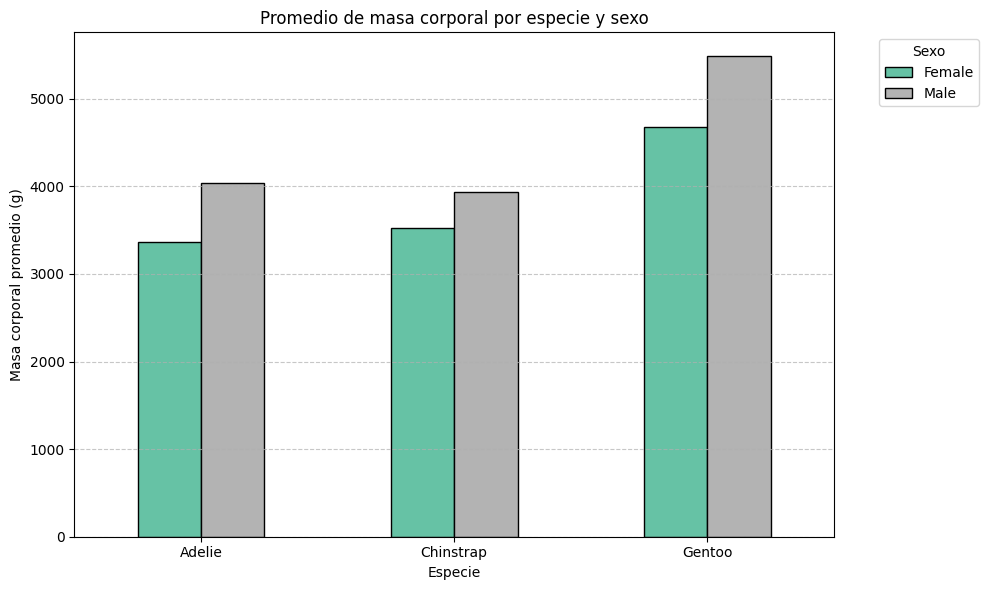

In [ ]:
import matplotlib.pyplot as plt

# Visualizar con un gráfico de barras
promedio_masa_especie_sexo.unstack().plot(kind='bar', figsize=(10, 6), colormap='Set2', edgecolor='black')
plt.title('Promedio de masa corporal por especie y sexo')
plt.ylabel('Masa corporal promedio (g)')
plt.xlabel('Especie')
plt.xticks(rotation=0)
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### <font color='purple'>Fin experimento </font>

## <font color='purple'>__Material adicional__</font>

- Uso de libreria seaborn: [Link](https://seaborn.pydata.org/tutorial.html)
- Dataset disponibles en seaborn: [Link](https://github.com/mwaskom/seaborn-data)
- Ejemplos de visualizacion con seaborn: [Link](https://www.datacamp.com/es/tutorial/seaborn-python-tutorial)

- Usos, ejemplos y material de apoyo de Matplotlib [Link](https://matplotlib.org/cheatsheets/)

### <font color='purple'>Fin material adicional </font>
